<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries-and-load-datasets" data-toc-modified-id="Import-libraries-and-load-datasets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries and load datasets</a></span></li><li><span><a href="#Variables-and-units" data-toc-modified-id="Variables-and-units-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Variables and units</a></span></li><li><span><a href="#Spatial-coverage" data-toc-modified-id="Spatial-coverage-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Spatial coverage</a></span><ul class="toc-item"><li><span><a href="#Locations-without-ISO-code" data-toc-modified-id="Locations-without-ISO-code-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Locations without ISO code</a></span></li><li><span><a href="#ISO-country-codes" data-toc-modified-id="ISO-country-codes-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>ISO country codes</a></span></li></ul></li><li><span><a href="#Temporal-coverage" data-toc-modified-id="Temporal-coverage-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Temporal coverage</a></span></li><li><span><a href="#Descriptive-statistics" data-toc-modified-id="Descriptive-statistics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Descriptive statistics</a></span></li><li><span><a href="#Sectors" data-toc-modified-id="Sectors-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Sectors</a></span><ul class="toc-item"><li><span><a href="#Production-based,-trade-related,-production-of-cement..." data-toc-modified-id="Production-based,-trade-related,-production-of-cement...-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Production-based, trade-related, production of cement...</a></span></li></ul></li></ul></div>

# Our World in Data - Data exploration

In this notebook, we explore the dataset on greenhouse gases (GHG) emissions used by __[Our World in Data](https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions)__.

Two datasets have been uploaded in our __[github repository](https://github.com/OpenGeoScales/ogs-data-exploration/tree/main/data/ghg-emissions/owid)__:
* GHG emissions : owid-co2-data.csv 
* Definition of variables : owid-co2-codebook.csv

Source of data: https://github.com/owid/co2-data.

# Summary of findings

The scope of this dataset is **GHG annual emissions per country**:
* CO2 emissions are from the Global Carbon Project, and other GHG emissions are from CAIT Climate Data Explorer 
* For the period 1990 to 2018, **trade-related CO2 emissions** are available, allowing to derive **consumption-based CO2 emissions**, as the sum of **production-based CO2 emissions** and trade-related CO2 emissions.
* CO2 emissions are provided for different industrial processes:
    * Production of cement, coal, oil, and gas,
    * Flaring
    * Other industrial processes (excluding cement)

Spatial coverage mostly include **countries** with associated **ISO 3-letter country codes**. Locations without country codes must be categorized to be associated with other dataset, if relevant.
* There are 236 geographical entities.
* Locations are mostly countries, and are mostly identified with a 3-letter ISO country codes (213 countries + the World).
* A few countries and specific regions do not have a country code associated (22 entities). 
    * Larger world regions are also included: **World, continents, group of countries (European Union)**. 
    * "International transport" is also categorised as one of the geographical entities.

The period covered by this dataset **starts in 1750** (with only Europe as a whole included) and **ends in 2019**.



## Import libraries and load datasets

In [48]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#url = ''
#co2_data = pd.read_csv(url, sep = ";")

In [5]:
path = os.getcwd()
subfolder = '/../data/'

In [14]:
co2_data = pd.read_csv(path+subfolder+'owid-co2-data.csv', sep = ";")
co2_codebook = pd.read_csv(path+subfolder+'owid-co2-codebook.csv', sep = ";")

## Variables and units

In [12]:
co2_data.head()

,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,NaN,0.002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7663783.0,NaN
1,AFG,Afghanistan,1950,0.084,475.000,0.070,NaN,NaN,NaN,0.011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752000.0,1.949480e+10
2,AFG,Afghanistan,1951,0.092,8.696,0.007,NaN,NaN,NaN,0.012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840000.0,2.006385e+10
3,AFG,Afghanistan,1952,0.092,NaN,NaN,NaN,NaN,NaN,0.012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7936000.0,2.074235e+10
4,AFG,Afghanistan,1953,0.106,16.000,0.015,NaN,NaN,NaN,0.013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8040000.0,2.201546e+10


Each line of the 'owid-co2-data.csv' provides values for a given country/region and a given year.

In [18]:
co2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             20930 non-null  object 
 1   country                              23708 non-null  object 
 2   year                                 23708 non-null  int64  
 3   co2                                  23170 non-null  float64
 4   co2_growth_prct                      21910 non-null  float64
 5   co2_growth_abs                       22017 non-null  float64
 6   consumption_co2                      3350 non-null   float64
 7   trade_co2                            3318 non-null   float64
 8   trade_co2_share                      3318 non-null   float64
 9   co2_per_capita                       22383 non-null  float64
 10  consumption_co2_per_capita           3350 non-null   float64
 11  share_global_co2            

In [17]:
co2_codebook.head(55)

,column,description,source
0,iso_code,ISO 3166-1 alpha-3 – three-letter country codes,International Organization for Standardization
1,country,Geographic location,Our World in Data
2,year,Year of observation,Our World in Data
3,co2,Annual production-based emissions of carbon di...,Global Carbon Project
4,co2_growth_prct,Percentage change in CO2 emissions from one ye...,Calculated by Our World in Data based on the G...
5,co2_growth_abs,Annual change in CO2 emissions from one year r...,Calculated by Our World in Data based on the G...
6,consumption_co2,"Annual consumption-based CO2 emissions, measur...",Global Carbon Project
7,trade_co2,Net CO2 emissions embedded in trade,NaN
8,trade_co2_share,"CO2 emissions embedded in trade, given as a pe...",Calculated by Our World in Data based on Globa...
9,co2_per_capita,"Average per capita CO2 emissions, measured in ...",Calculated by Our World in Data based on the G...


There are 55 variables in the dataset. Most of the variables were derived by Our World in Data from 11 primary variables. The values for these variables come from different sources:

| Primary variable | Source | Unit |
| :--- | :---- | :--- | 
| Country name | Our World in Data | |
| Country code | International Organization for Standardization | ISO 3166-1 alpha-3 – three-letter |
| Year | Our World in Data |  |
| CO2 production-based emissions | Global Carbon Project | million tonnes  |
| CO2 trade related emissions | Not Available | million tonnes per year |
| CO2 emissions from different industrial processes | Global Carbon Project | million tonnes  |
| Other GHG emissions: Methane, nitrous oxide, total GHG | CAIT Climate Data Explorer | million tonnes of carbon dioxide equivalents |
| Primary energy consumption | BP Statistical Review of World Energy | terawatt-hours |
| Population | Gapminder and UN Population estimates | number of inhabitants |
| Gross Domestic Product (GDP) | Maddison Project Database | US dollars |


CO2 emissions from different industrial processes include:
* Production of cement, coal, oil, and gas,
* Flaring
* Other industrial processes (excluding cement)

NB: __[OWID website](https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions)__ was used to retrieve additional information: 
* GDP is measured in constant 2011 international USD, which adjust for inflation and cross-country price differences.
* CO2 trade related emissions : ??

In [86]:
# listing primary variables by category
co2_primary_variables = ['co2', 'trade_co2', 'cement_co2', 'coal_co2', 'flaring_co2',
                         'gas_co2', 'oil_co2', 'other_industry_co2']

other_ghg_primary_variables = ['methane', 'nitrous_oxide', 'total_ghg']

other_primary_variables = ['primary_energy_consumption', 'population', 'gdp']

To better visualise available variables in this dataset (both primary variables and derived indicators), see the diagram at __[this Draft page](https://draft.io/jmantz99zvyn6q24kga4uxp4d8penscxs9fxcnjxdjb8)__.

## Spatial coverage

In [38]:
no_of_geo_entities = co2_data['country'].nunique()
print(f'There are {no_of_geo_entities} geographical entities in the dataset.')

There are 236 geographical entities in the dataset.


In [34]:
country_list = co2_data['country'].unique().tolist()
country_list

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Asia (excl. China & India)',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'EU-27',
 'EU-28',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 '

### Locations without ISO code

In [32]:
co2_data.loc[co2_data['iso_code'].isnull()]['country'].nunique()

22

In [33]:
regions_without_iso_code = co2_data.loc[co2_data['iso_code'].isnull()]['country'].unique().tolist()
regions_without_iso_code

['Africa',
 'Asia',
 'Asia (excl. China & India)',
 'EU-27',
 'EU-28',
 'Europe',
 'Europe (excl. EU-27)',
 'Europe (excl. EU-28)',
 'French Equatorial Africa',
 'French West Africa',
 'International transport',
 'Kuwaiti Oil Fires',
 'Leeward Islands',
 'Macao',
 'Micronesia',
 'North America',
 'North America (excl. USA)',
 'Oceania',
 'Panama Canal Zone',
 'Ryukyu Islands',
 'South America',
 'St. Kitts-Nevis-Anguilla']

There are 22 items of country that do not have a matching ISO code provided and belong to the following categories:
* Countries such as Micronesia, Ryukyu Islands, 
* Continents or continents excluding a few countries and group of countries (EU-27, EU-28),
* Specific locations such as 'Kuwaiti Oil Fires', 'Panama Canal Zone',
* International transport.

### ISO country codes

In [40]:
no_of_iso_coded_entities = co2_data.loc[co2_data['iso_code'].notnull()]['iso_code'].nunique()
print(f'There are {no_of_iso_coded_entities} geographical entities with a country code in the dataset.')

There are 214 geographical entities with a country code in the dataset.


In [35]:
co2_data.loc[co2_data['iso_code'].notnull()]['iso_code'].unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM',
       'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR',
       'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH', 'BWA',
       'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN',
       'CPV', 'CAF', 'TCD', 'CHL', 'CHN', 'CXR', 'COL', 'COM', 'COG',
       'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'COD', 'DNK',
       'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST',
       'SWZ', 'ETH', 'FRO', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB',
       'GEO', 'DEU', 'GHA', 'GRC', 'GRL', 'GRD', 'GTM', 'GIN', 'GNB',
       'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN',
       'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN',
       'KIR', 'OWID_KOS', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR',
       'LBY', 'LIE', 'LTU', 'LUX', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI',
       'MLT', 'MHL', 'MRT', 'MUS', 'MEX', 'MDA', 'MNG', 'MNE', 'MSR',
       'MAR', '

In [42]:
co2_data.loc[co2_data['iso_code'].isin(['OWID_WRL', 'OWID_KOS'])]

,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
11662,OWID_KOS,Kosovo,2008,7.387,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11663,OWID_KOS,Kosovo,2009,8.130,10.069,0.744,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11664,OWID_KOS,Kosovo,2010,8.372,2.974,0.242,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11665,OWID_KOS,Kosovo,2011,8.310,-0.744,-0.062,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11666,OWID_KOS,Kosovo,2012,7.874,-5.247,-0.436,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23446,OWID_WRL,World,2015,35209.447,-0.101,-35.422,NaN,NaN,NaN,4.771,...,6.756,8660.01,1.173,3052.82,0.414,151720.063,20558.840,1.447,7.379797e+09,1.048550e+14
23447,OWID_WRL,World,2016,35220.412,0.031,10.966,NaN,NaN,NaN,4.719,...,6.613,8550.06,1.146,3054.00,0.409,153848.433,20612.002,1.444,7.464022e+09,1.065610e+14
23448,OWID_WRL,World,2017,35696.349,1.351,475.936,NaN,NaN,NaN,4.729,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.547859e+09,NaN
23449,OWID_WRL,World,2018,36419.712,2.026,723.363,NaN,NaN,NaN,4.773,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.631091e+09,NaN


There are 2 entities that do have a country code different from the 3-letter code, and correspond to:
* The world
* Kosovo.

## Temporal coverage

period, time series, exhaustivity?

In [46]:
# Temporal coverage: Number of considered years
start_year = co2_data['year'].min()
end_year = co2_data['year'].max()

print(f'The dataset covers the period [{start_year} - {end_year}].')

The dataset covers the period [1750 - 2019].


In [58]:
# Count number of values available per year
by_year = co2_data.groupby(by = 'year').count()

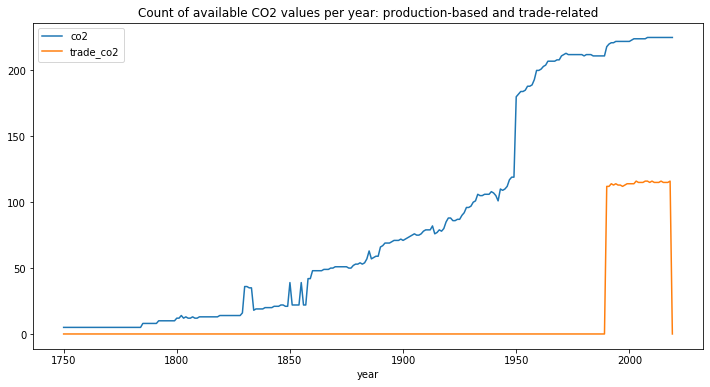

In [73]:
by_year[['co2', 'trade_co2']].plot(figsize=(12,6),
    title = 'Count of available CO2 values per year: production-based and trade-related');

In [77]:
# First year with trade-related CO2 emissions available
start_year_trade_co2 = co2_data.loc[co2_data['trade_co2'].notnull(),'year'].min()
start_year_trade_co2

1990

Overall CO2 emissions are more available in recent period :
* The closer we get to 2019, the more values are available for production-based CO2 emissions.
* Trade-related CO2 emissions are available from 1990 to 2018.

In [85]:
co2_data.loc[co2_data['year']==1750]

,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
6150,NaN,EU-28,1750,9.351,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7141,NaN,Europe,1750,9.351,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155942992.0,NaN
7411,NaN,Europe (excl. EU-27),1750,9.351,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22099,GBR,United Kingdom,1750,9.351,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23181,OWID_WRL,World,1750,9.351,NaN,NaN,NaN,NaN,NaN,0.012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,811562112.0,NaN


In [80]:
co2_data.loc[(co2_data['co2'].notnull()) & (co2_data['year']=='1750')]['country']

Series([], Name: country, dtype: object)

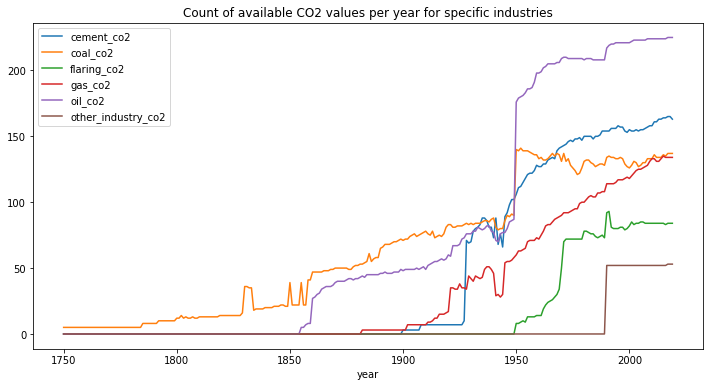

In [74]:
by_year[['cement_co2', 'coal_co2', 'flaring_co2','gas_co2', 'oil_co2', 'other_industry_co2']].plot(figsize=(12,6),
    title = 'Count of available CO2 values per year for specific industries');

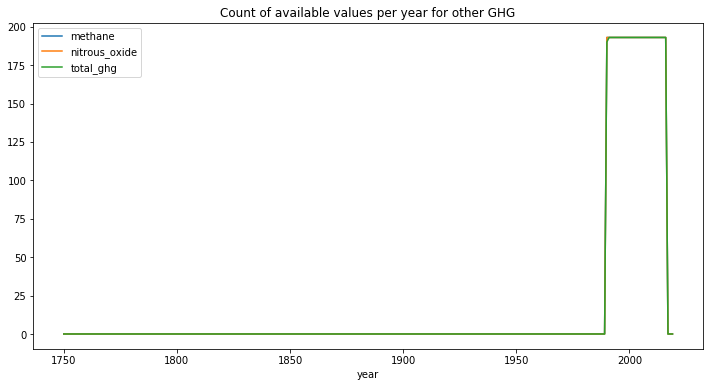

In [70]:
by_year[other_ghg_primary_variables].plot(figsize=(12,6),
                                          title = 'Count of available values per year for other GHG');

In [87]:
co2_data.loc[co2_data['methane'].notnull(),'year'].min()

1990

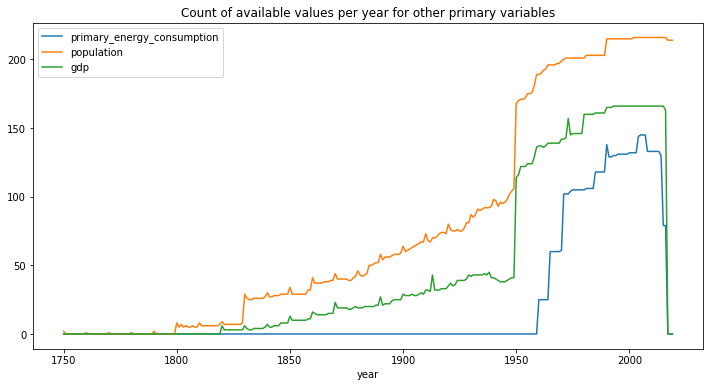

In [71]:
by_year[other_primary_variables].plot(figsize=(12,6),
                                          title = 'Count of available values per year for other primary variables');

## Descriptive statistics

## Sectors

### Production-based, trade-related, production of cement...